# Supervised Learning   

## League of Legends SoloQ matches at 15 minutes 2024

### Introduction

#### Dataset

This dataset was obtained from [Kaggle's LOL page](https://www.kaggle.com/datasets/karlorusovan/league-of-legends-soloq-matches-at-10-minutes-2024/data). The dataset contains data about the first 15 minutes of game play for over 24 thousand solo queue matches taken from european servers (EUNE and EUW).

Average ELO of the matches is between mid emerald to high diamond, which represents the top 10% of players, therefore (hopefully) reducing the probability of a player doing a game-changing mistake.

There are 14 features for red, and 14 features for the blue team (feature blueTeamFirstBlood counts for both teams since it tells us which team got the first kill), with the target feature being blueWin. blueWin == 1 indicates a victory of the blue team, and blueWin == 0 means that the red team won.

#### Problem

The main purpose of the dataset is to help train models to predict the winner based on how the first 15 minutes of the match played out.

#### Solution

We will train a supervised learning model using the aforementioned dataset. Therefore, the downloaded dataset will be split into a training and a test set, so that we can train the model and evaluate it afterwards. We will evaluate the model utilizing accuracy, precision, sensitivity and F-measure, depending on our needs.

### Libraries

In [86]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

### Creating Dataframe

In [88]:
df = pd.read_csv('match_data_v5.csv')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


As you can see, for some reason, the downloaded dataset does not have headers. Let's go ahead and label them, by the order they are displayed on the website.

In [89]:
df.columns =["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps","redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]

df.head()

,matchID,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin,empty
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


Now that we see the dataset labeled correctly, we can see that there are only numerical values, except for `matchID`, and that there is an extra column that only consists of zeros.

In [90]:
df['empty'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: empty, dtype: int64

Therefore, we will remove both columns from the dataset.

In [91]:
df = df.drop(columns=['matchID', 'empty'])

df.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


In [92]:
# Check missing values
df.isna().any()

blueTeamControlWardsPlaced       False
blueTeamWardsPlaced              False
blueTeamTotalKills               False
blueTeamDragonKills              False
blueTeamHeraldKills              False
blueTeamTowersDestroyed          False
blueTeamInhibitorsDestroyed      False
blueTeamTurretPlatesDestroyed    False
blueTeamFirstBlood               False
blueTeamMinionsKilled            False
blueTeamJungleMinions            False
blueTeamTotalGold                False
blueTeamXp                       False
blueTeamTotalDamageToChamps      False
redTeamControlWardsPlaced        False
redTeamWardsPlaced               False
redTeamTotalKills                False
redTeamDragonKills               False
redTeamHeraldKills               False
redTeamTowersDestroyed           False
redTeamInhibitorsDestroyed       False
redTeamTurretPlatesDestroyed     False
redTeamMinionsKilled             False
redTeamJungleMinions             False
redTeamTotalGold                 False
redTeamXp                

The rest of the dataset does not contain any missing values.

In [93]:
df.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,...,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.00000
mean,3.610815,41.362023,12.792487,0.737833,0.123591,0.654902,0.002023,8.915789,0.503860,349.240578,...,0.103117,0.955088,0.001527,3.884045,350.287554,88.547368,27788.709391,29619.035789,32156.531682,0.49453
std,2.018622,43.471913,4.910510,0.722126,0.329247,0.885749,0.054101,3.083976,0.499995,31.339593,...,0.304117,0.981776,0.044021,2.591134,31.593160,14.120346,2694.330794,1896.275564,6041.175604,0.49998
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.000000,10383.000000,0.00000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,79.000000,25910.000000,28387.000000,28024.000000,0.00000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27629.000000,29632.000000,31938.000000,0.00000
75%,5.000000,35.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29514.000000,30866.000000,36029.000000,1.00000
max,37.000000,603.000000,38.000000,2.000000,2.000000,10.000000,2.000000,22.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.000000,62452.000000,1.00000


## Initial Baseline

We will start by calculating the accuracy for some models before doing any data processing, so we can track our models evolution throughout the notebook.

In [94]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# copy the dataframe to another place

model_df = df.copy()

all_inputs = model_df.drop('blueWin', axis=1)
all_labels = model_df['blueWin'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.10)

print(model_df["blueWin"].value_counts(normalize=True))

# Train the model decision tree
model = DecisionTreeClassifier(
    max_depth=3
)

model.fit(training_inputs, training_classes)

file = open('iris_dtc.dot', 'w')
out_file = tree.export_graphviz(model, out_file=file)
file.close()

model.fit(training_inputs, training_classes)

print("Decision Tree")
print(model.score(testing_inputs, testing_classes))

# Train the model SVM
model = SVC()
model.fit(training_inputs, training_classes)

print("SVM")
print(model.score(testing_inputs, testing_classes))

# Train the model KNN

model = KNeighborsClassifier()

model.fit(training_inputs, training_classes)

print("KNN")
print(model.score(testing_inputs, testing_classes))

decision_tree_classifier = DecisionTreeClassifier(
    max_depth=5,
)

blueWin
0    0.50547
1    0.49453
Name: proportion, dtype: float64
Decision Tree
0.7346264960792406
SVM
0.749484110606686
KNN
0.7164671894345852


In the `blueTeamWardsPlaced` column, the maximum number that shows is 603, when the mean is 41.36. This shows us that there might be some outliers in our dataset.

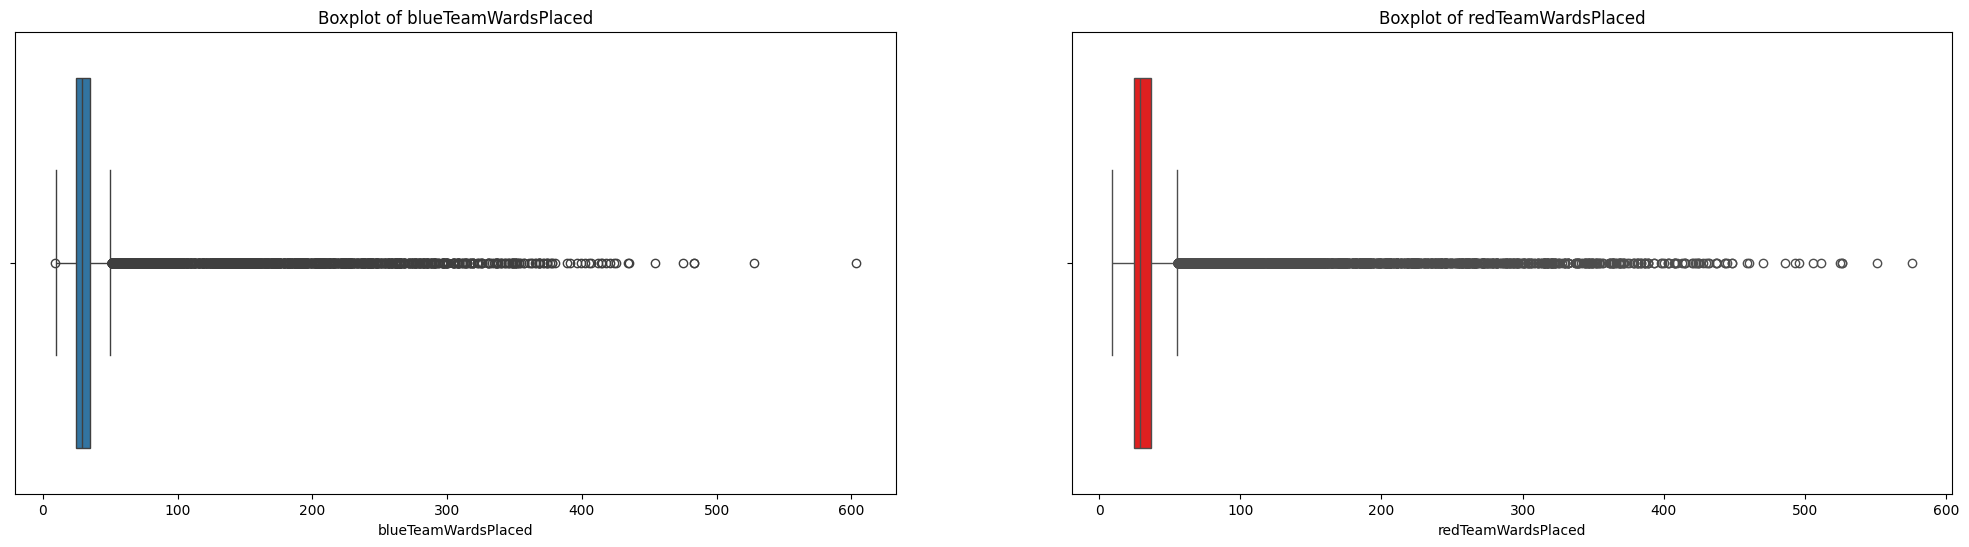

In [95]:
plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sb.boxplot(x=df['blueTeamWardsPlaced'])
plt.title('Boxplot of blueTeamWardsPlaced')

plt.subplot(1,2,2)
sb.boxplot(x=df['redTeamWardsPlaced'], color='red')
plt.title('Boxplot of redTeamWardsPlaced')
plt.show()

The graphs show us that there are a lot of outliers, according to the IQR method. Therefore, we do not believe it is wise to delete every single outlier, so we will only delete outliers above 150 wards placed, based on the `mean` and `standard deviation`.

In [96]:
Q1 = df['blueTeamWardsPlaced'].quantile(0.25)
Q3 = df['blueTeamWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Remove from red and blue team
outliers = df[(df['blueTeamWardsPlaced'] > upper_bound) | (df['redTeamWardsPlaced'] > upper_bound)]

print("Number of outliers from both teams: " + str(outliers['blueTeamWardsPlaced'].count()))

outliers[['blueTeamWardsPlaced', 'redTeamWardsPlaced']].describe()

Number of outliers from both teams: 6235


,blueTeamWardsPlaced,redTeamWardsPlaced
count,6235.000000,6235.000000
mean,78.278107,85.640417
std,73.428825,77.771134
min,13.000000,13.000000
25%,28.000000,30.000000
50%,54.000000,61.000000
75%,92.000000,101.000000
max,603.000000,576.000000


The common way of calculating outliers tells us that there are a lot of outliers and as the table shows, the maximum number of wards placed dropped drastically. We do not want lower the numbers that much, so we decided to calculate the 95th percentile and remove those.

In [97]:
# Calculate the 99th percentile for 'blueTeamWardsPlaced'
q_blue = df['blueTeamWardsPlaced'].quantile(0.95)

# Remove the top 15% of outliers from 'blueTeamWardsPlaced'
df = df[df['blueTeamWardsPlaced'] <= q_blue]

# Calculate the 95th percentile for 'redTeamWardsPlaced'
q_red = df['redTeamWardsPlaced'].quantile(0.95)

# Remove the top 15% of outliers from 'redTeamWardsPlaced'
df = df[df['redTeamWardsPlaced'] <= q_red]

df.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,...,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.00000,21889.000000,21889.000000
mean,3.607383,32.766367,12.784138,0.734341,0.123030,0.651195,0.002010,8.905478,0.502536,349.327151,...,0.103203,0.953538,0.001690,3.877701,350.354653,88.626022,27790.878341,29616.93901,32140.930330,0.494632
std,2.021628,15.764000,4.910870,0.722137,0.328618,0.886306,0.054036,3.079682,0.500005,31.429227,...,0.304230,0.982945,0.046308,2.589159,31.574929,14.074764,2699.838449,1897.63872,6049.635667,0.499983
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.00000,10383.000000,0.000000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,80.000000,25916.000000,28387.00000,28001.000000,0.000000
50%,3.000000,28.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27635.000000,29630.00000,31911.000000,0.000000
75%,5.000000,34.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29515.000000,30862.00000,36019.000000,1.000000
max,37.000000,133.000000,38.000000,2.000000,2.000000,10.000000,2.000000,21.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.00000,62452.000000,1.000000


So if we show the graphs again...

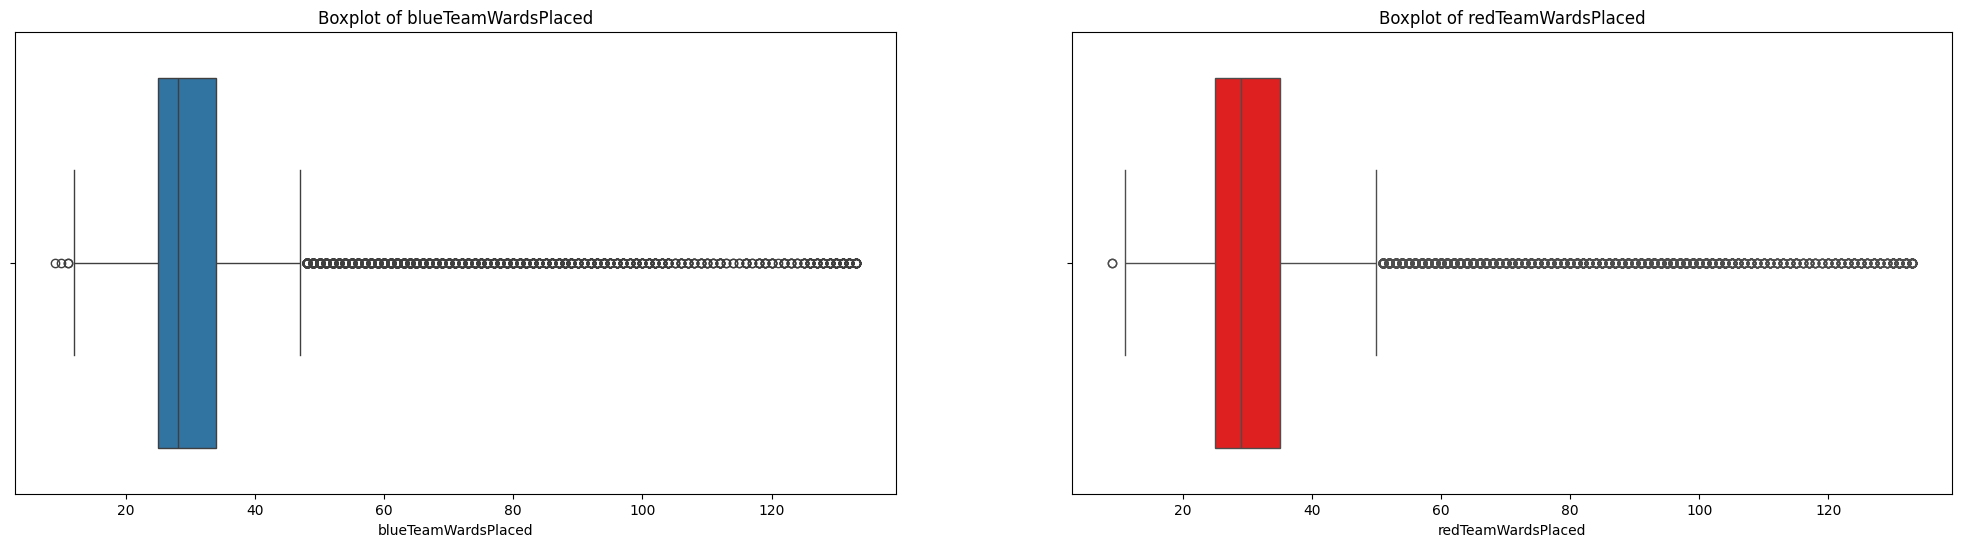

,blueTeamWardsPlaced,redTeamWardsPlaced
count,21889.000000,21889.000000
mean,32.766367,34.572388
std,15.764000,18.509073
min,9.000000,9.000000
25%,25.000000,25.000000
50%,28.000000,29.000000
75%,34.000000,35.000000
max,133.000000,133.000000


In [98]:
plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sb.boxplot(x=df['blueTeamWardsPlaced'])
plt.title('Boxplot of blueTeamWardsPlaced')

plt.subplot(1,2,2)
sb.boxplot(x=df['redTeamWardsPlaced'], color='red')
plt.title('Boxplot of redTeamWardsPlaced')
plt.show()

df[['blueTeamWardsPlaced', 'redTeamWardsPlaced']].describe()

The `count` value has decreased circa 2400 lines after removing these outliers.

### Data Analysis

Let's now analyze the different features based on the match result, the latter represented by `blueWin`.

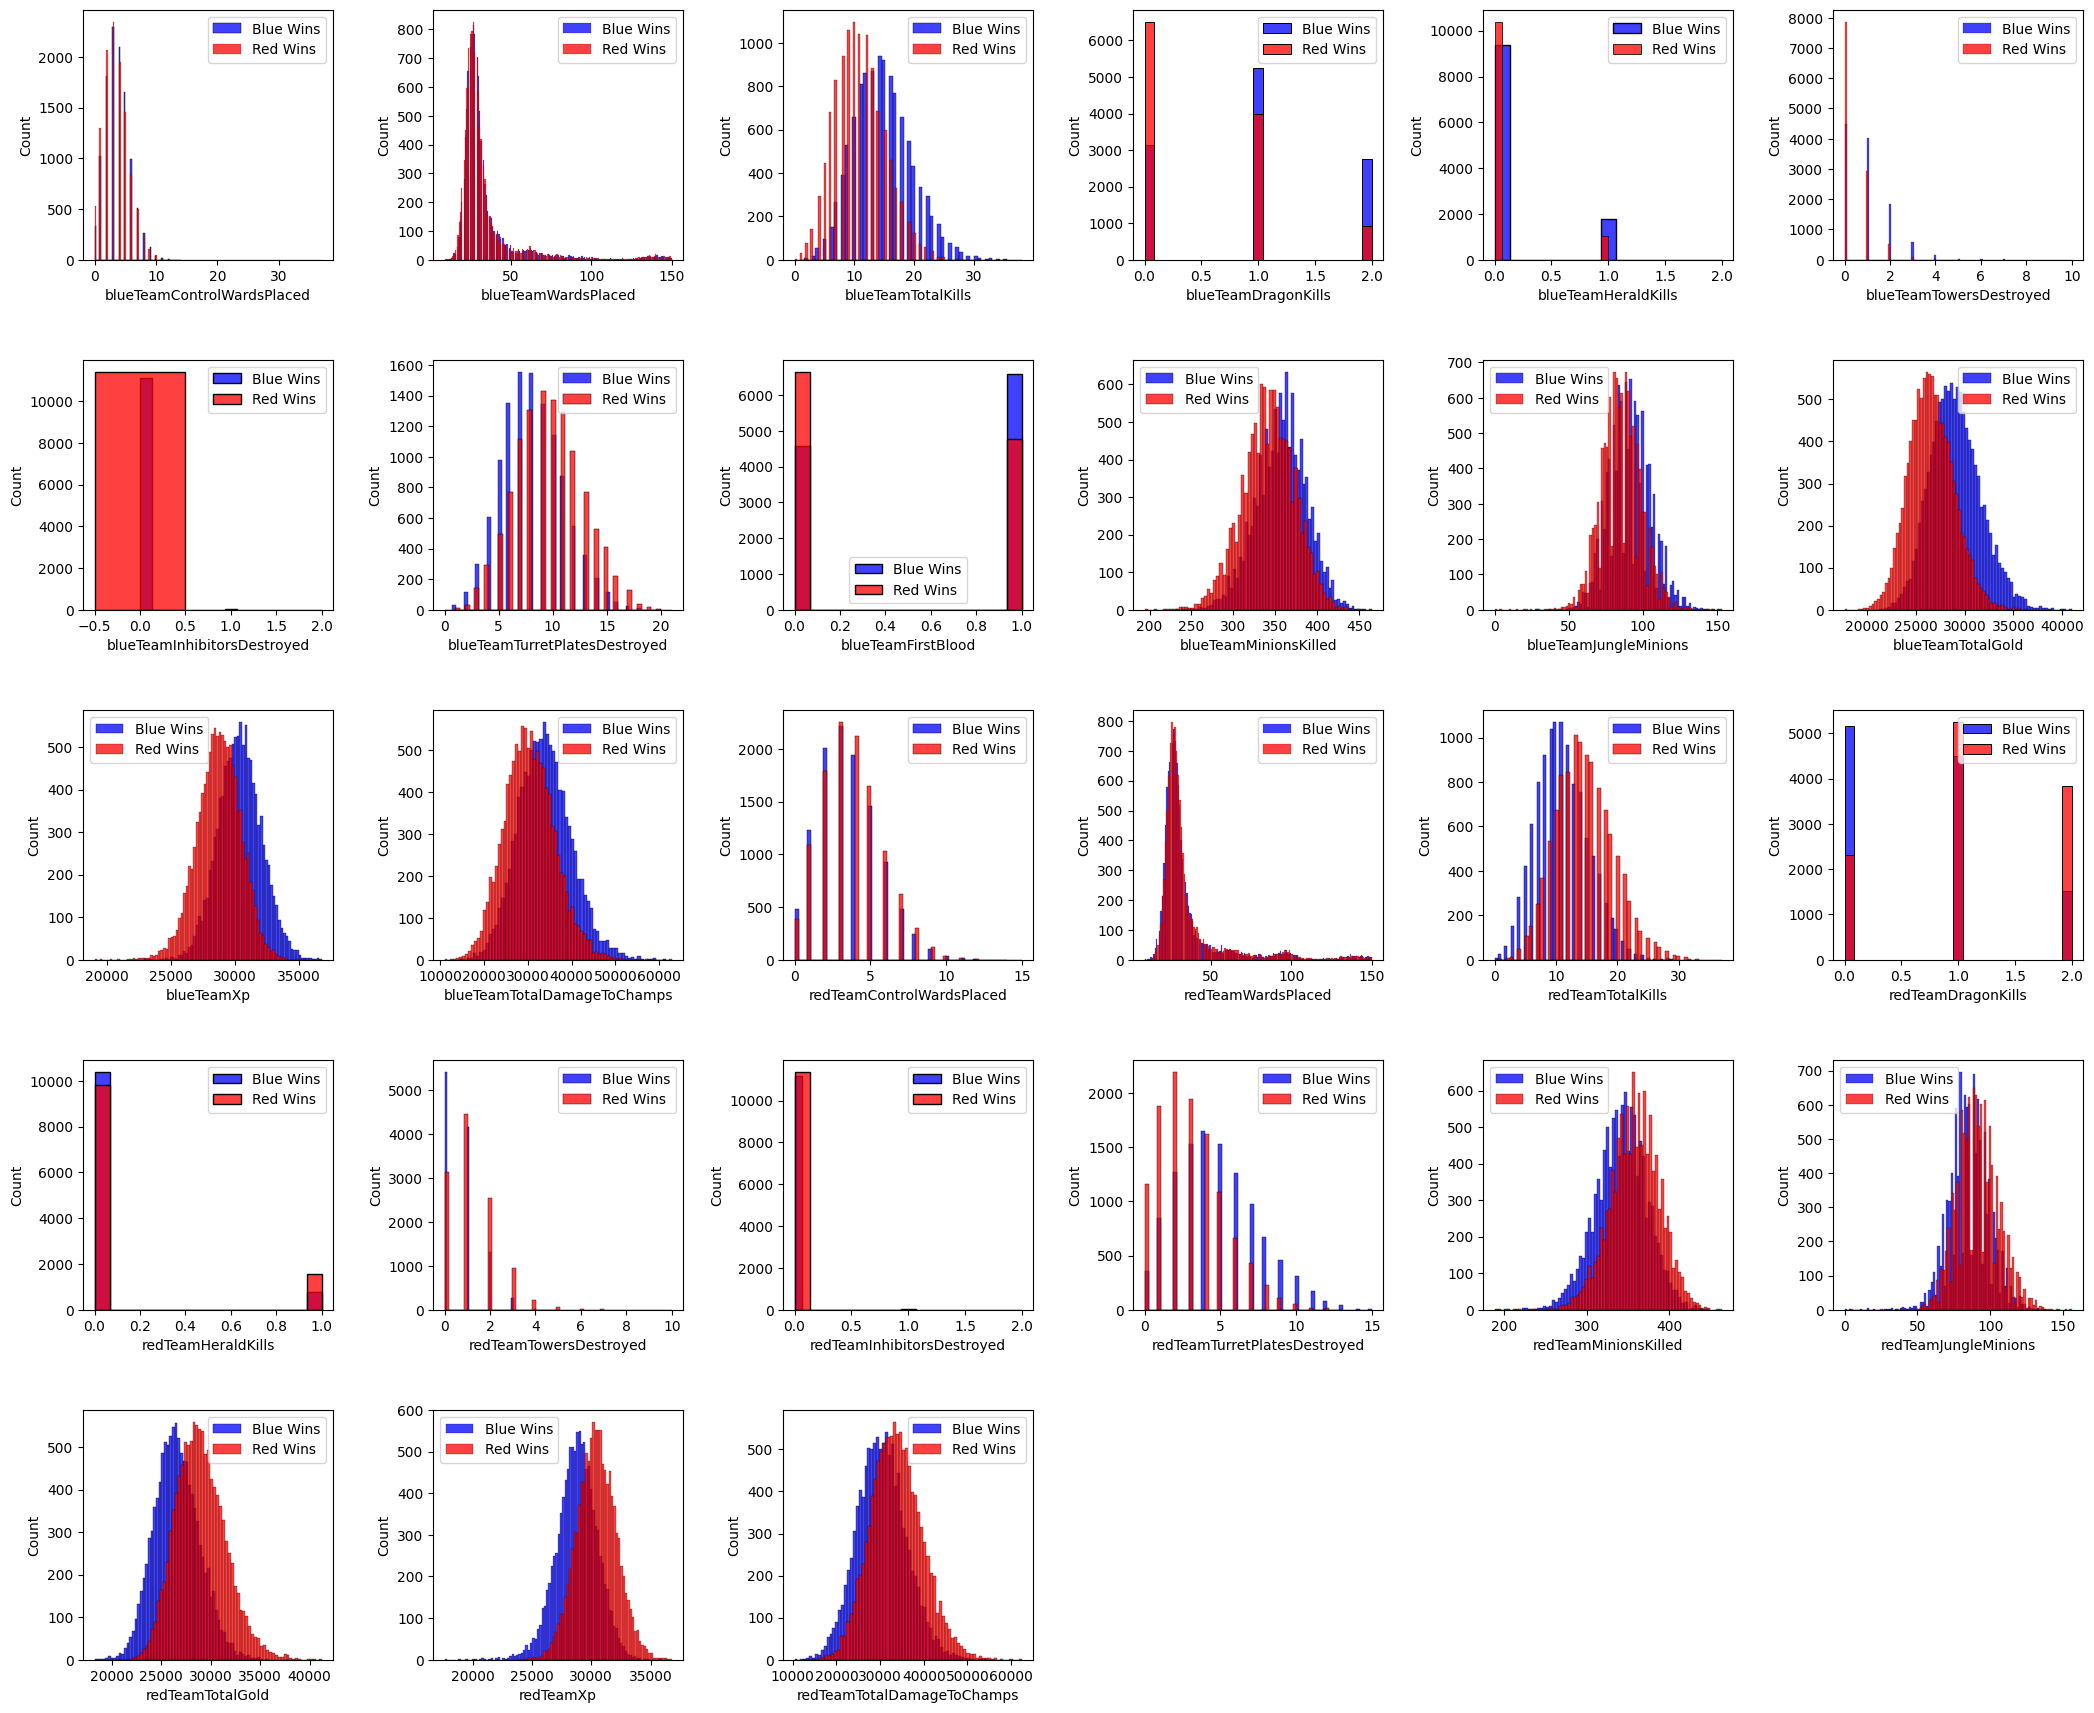

In [28]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

dfBlueWins = df[df['blueWin']==1].drop(['blueWin'],axis=1)
dfRedWins = df[df['blueWin']==0].drop(['blueWin'],axis=1)

cols = list(dfBlueWins.columns)

for i, col in enumerate(cols):
    plt.subplot(6,6,i+1)
    sb.histplot(data=dfBlueWins[col], color='blue', label = 'Blue Wins', kde=False)
    sb.histplot(data=dfRedWins[col], color='red', label = 'Red Wins', kde=False)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()

The graphs displayed make sense. When the blue team has more of some statistic, they usually win and vice-versa. The only graphic that may be weird to a person that does not know how the game works is `TurretPlatesDestroyed` ones. When the team destroys more plates, the winning count for that team starts decreasing.
Due to the fact that, for example, `ward` related statistics do not influence the game that much, as seen in the graphs, we will calculate the correlation between the winning team and the features. 

<Axes: >

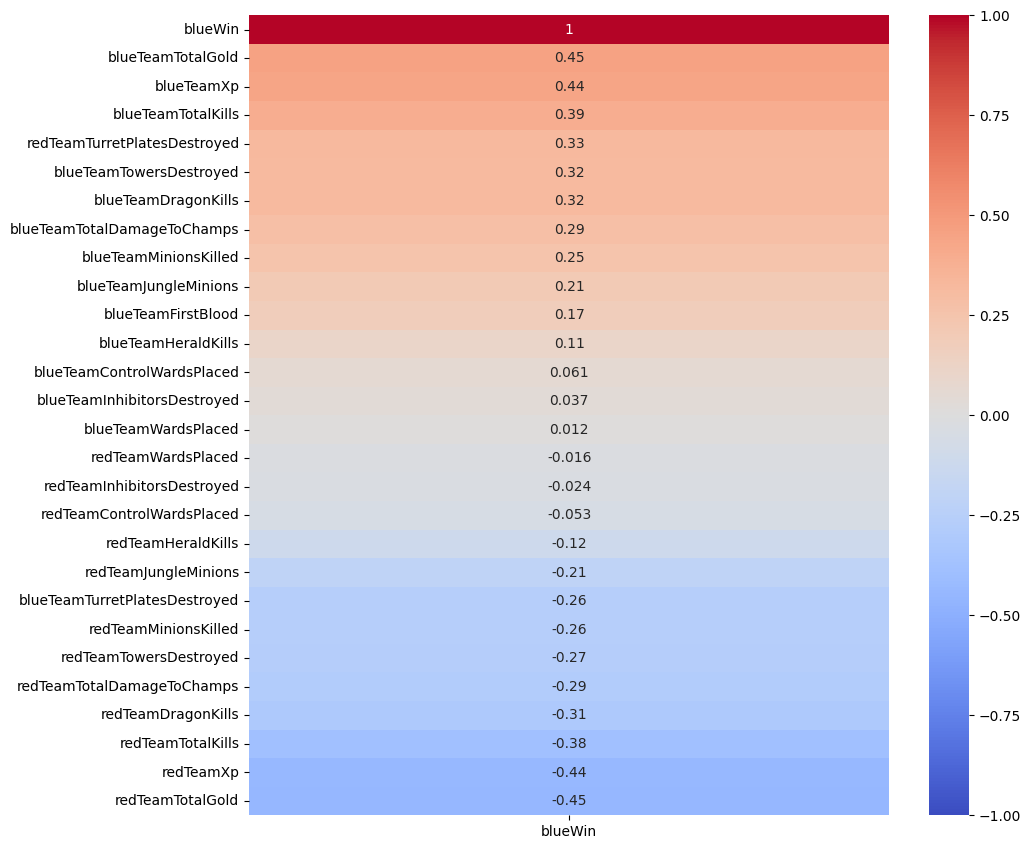

In [29]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

As we suspected before, there was something wrong with the `TeamTurretPlatesDestroyed` columns. We initially added the columns as they were in the website, but based on the graphs and the fact that the `blueTeamTurretPlatesDestroyed` is influencing a win for the Red team and vice-versa, we believe that the columns may be swapped.

<Axes: >

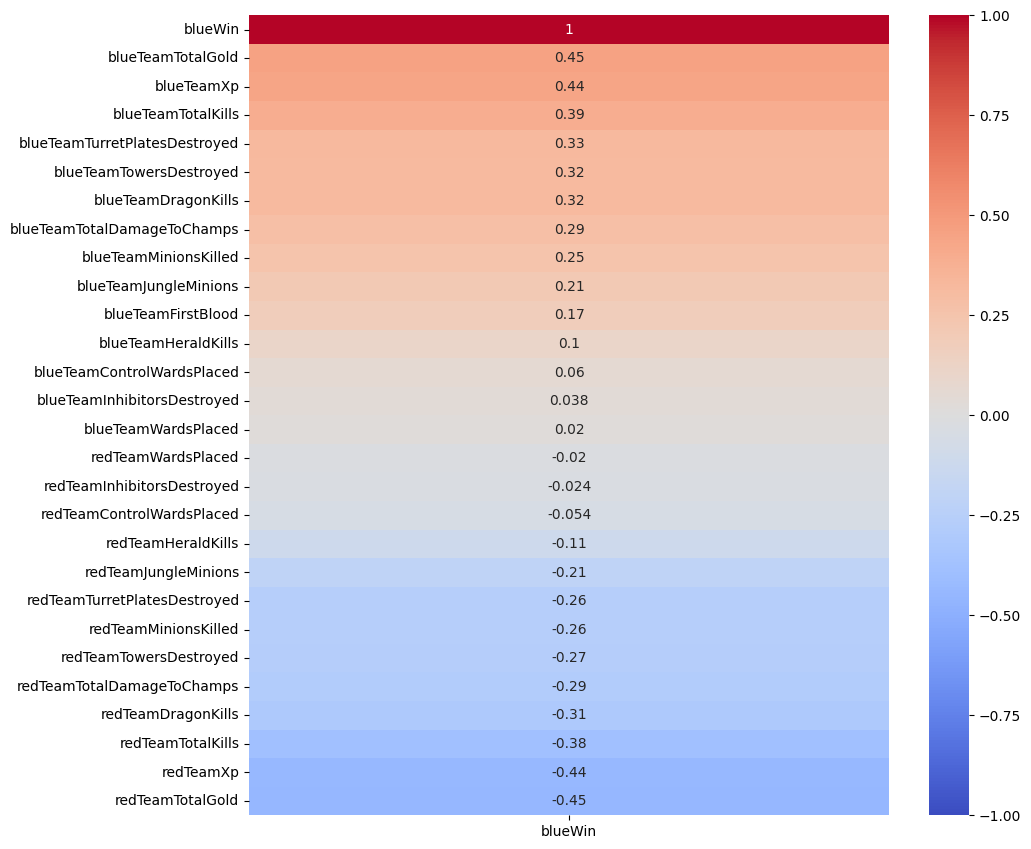

In [99]:
# Swap the blueTeamTurretPlatesDestroyed and redTeamTurretPlatesDestroyed columns
df['blueTeamTurretPlatesDestroyed'], df['redTeamTurretPlatesDestroyed'] = df['redTeamTurretPlatesDestroyed'], df['blueTeamTurretPlatesDestroyed']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

The correlation heatmap now makes much more sense.

### Feature Extraction

We will now calculate the correlation between features and see if we can reduce the number of columns of the dataset. The objective of feature extraction is to remove the total number of columns by grouping related columns together. Therefore, we will calculate the features that have over 75% correlation between them. We started on 95%, but the highest correlation between features in our dataset was 85%, so we decided to lower the percentage.

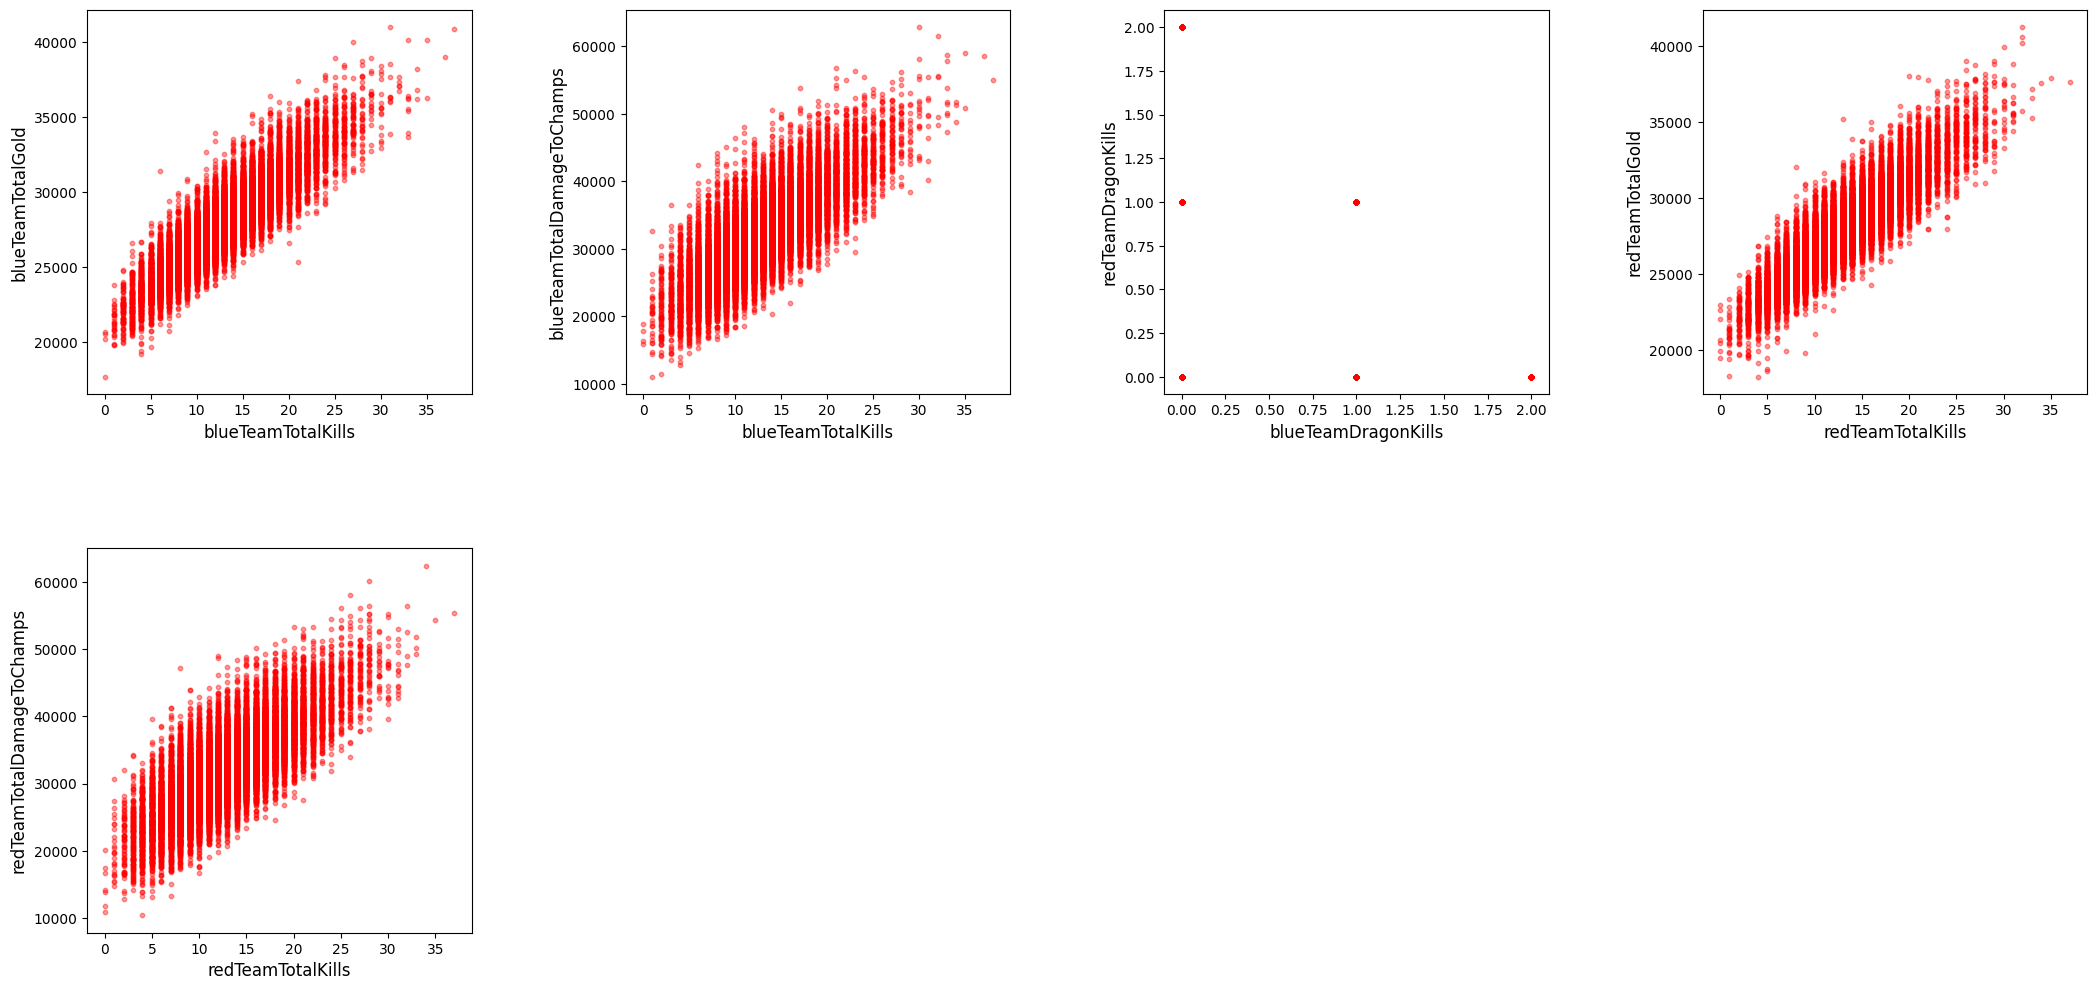

In [100]:
cols = list(df.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'blueWin':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'blueWin':
            continue
        if math.fabs(df[col1].corr(df[col2])) > 0.75:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

blueWin
0    11414
1    11163
Name: count, dtype: int64
blueWin
0    0.505559
1    0.494441
Name: proportion, dtype: float64
Decision Tree
Decision Tree
0.7382639503985828
SVM
0.7590788308237378
KNN
0.7240921169176262


Text(0.5, 1.0, 'Average score: 0.7474848841494213')

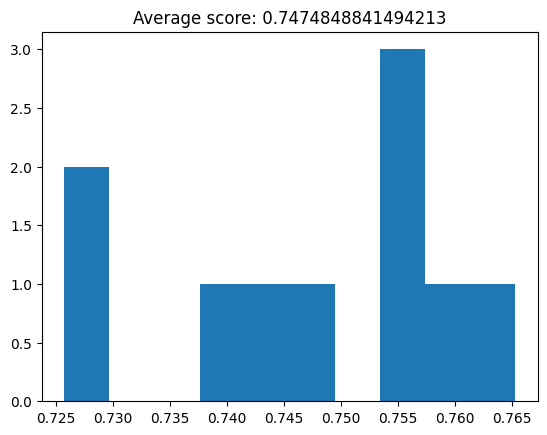

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

all_inputs = df.drop('blueWin', axis=1)
all_labels = df['blueWin'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.10)

print(df["blueWin"].value_counts())
print(df["blueWin"].value_counts(normalize=True))

# Train the model decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=3
)

import sklearn.tree as tree

model.fit(training_inputs, training_classes)

print("Decision Tree")

file = open('iris_dtc.dot', 'w')
out_file = tree.export_graphviz(model, out_file=file)
file.close()


model.fit(training_inputs, training_classes)

print("Decision Tree")
print(model.score(testing_inputs, testing_classes))

# Train the model SVM
from sklearn.svm import SVC
model = SVC()
model.fit(training_inputs, training_classes)

print("SVM")
print(model.score(testing_inputs, testing_classes))

# Train the model KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(training_inputs, training_classes)

print("KNN")
print(model.score(testing_inputs, testing_classes))



from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier(
    max_depth=5,
)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

